In [1]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import pickle
import matplotlib.pyplot as plt

In [2]:
adata = sc.read_h5ad(open("/nfs/team283/aa16/KR_NAS/data/CR_cells_19pcw+14pcw_AnnData_1.h5ad", "rb"))

In [3]:
adata.var_names = adata.var['SYMBOL']

In [4]:
adata.obs['Pool'].loc[adata.obs['Pool'] == 'CRcellsB'] = 'CRcells'

In [5]:
adata = adata[adata.obs['Pool'] == 'CRcells',:]

In [6]:
DE_results = pd.read_pickle(open("/nfs/team283/aa16/KR_NAS/0_publication_tables/CR_cells_DE_14pcw_vs_19pcw_cc.p", "rb" ))

In [7]:
DE_results = DE_results['14 pcw_vs_19 pcw']

In [8]:
frontal_markers = ['CLMP', 'CTNNBL1', 'CBLN2', 'VSTM2L',
                   'CPNE8', 'SLN', 'CNTN4', 'MB21D2']
occipital_markers = ['PENK', 'EPHA3', 'WSCD1', 'NPY', 'TENM4', 'NR2F1',
                     'FGFR3', 'LHX2', 'WNT7B']
genesOfInterest = np.array(('MMRN2', 'REEP4', 'STH', 'SLCO5A1'))

In [39]:
subset = [np.abs(DE_results['log2fc'].iloc[i]) > 1 and DE_results['qval'].iloc[i] < 10**(-7) for i in range(len(DE_results['log2fc']))]

In [40]:
genesOfInterest = np.concatenate([np.array(('RELN')).reshape((1)), np.array(DE_results.loc[subset,:]['gene'])])

In [41]:
genesOfInterest

array(['RELN', 'RPS4Y1', 'ATF5', 'HSPA8', 'EIF3C', 'SUPT7L', 'SNAP25',
       'SUB1', 'COX5A', 'USP9Y', 'TRH', 'CLU', 'KDM5D', 'CANX', 'PCP4',
       'SRP14', 'NLGN4Y', 'DCTN2', 'SOD1', 'VGF'], dtype=object)

In [42]:
geneNames = adata.var_names[[g in genesOfInterest for g in adata.var_names]]
counts_cpm = adata.layers['X_corrected_cc_cpm'][:,[g in genesOfInterest for g in adata.var_names]]
age  = adata.obs['Age']

In [43]:
tab = pd.DataFrame(index = range(np.prod(np.shape(counts_cpm))), columns = ('gene', 'counts', 'Age'))
n_genes = np.shape(counts_cpm)[1]
n_samples = np.shape(counts_cpm)[0]
for i in range(len(geneNames)):
    tab.iloc[(i*n_samples):((i+1)*n_samples),0] = geneNames[i]
    tab.iloc[(i*n_samples):((i+1)*n_samples),1] = counts_cpm[:,i] + 5
    tab.iloc[(i*n_samples):((i+1)*n_samples),2] = age

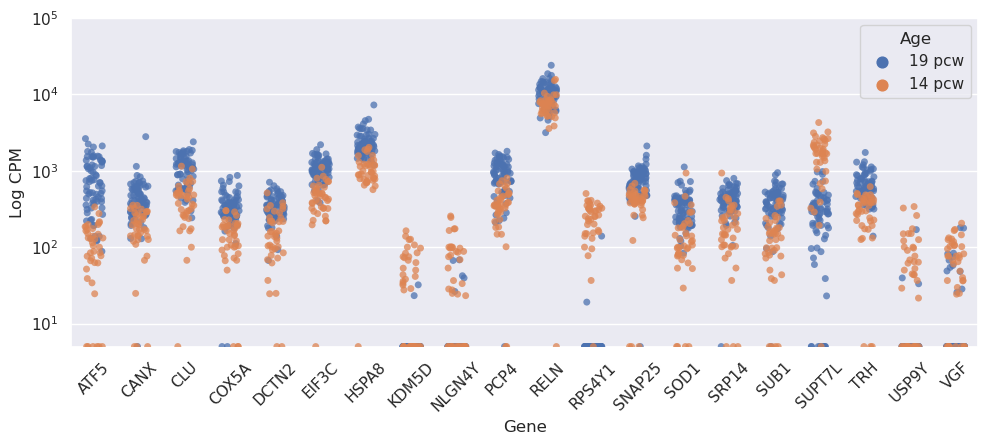

In [44]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,4.27)})
sns.stripplot(x="gene", y="counts", hue="Age", data=tab, alpha = 0.75, jitter=0.2)
plt.yscale('log')
plt.ylabel('Log CPM')
plt.xlabel('Gene')
plt.ylim(5, 10**5)
plt.xticks(rotation=45)
plt.show()